# Risk Catergory Prediction using XGBOOST


* grouping based on hard thresholds (e.g., Tier 1 if risk <70),
* Building a tree-based machine learning model to learn patterns itself.

- Inputs: Arrears, dp1, dp3, mobile/email flags, zone 
- Output: Tier 1 / Tier 2 / Tie

Traditional tiers (Tier 1, 2, 3) use fixed thresholds:

1. Score > 70 = Tier 1

2. Score 70–100 = Tier 2

3. Score >100 = Tier 3

but it's a rule-based approach. It treats each variable as equally important and linear.



XGBOOST Update

1. It learns patterns automatically — even non-linear ones

2. It weighs features differently (e.g., maybe low mobile contact plus low dp3 is more risky than high arrears alone)

3. It can interact features (e.g., low dp1 and Zone 3 and dp3 < 650) to discover new hidden rules

4. It can tell you feature importance (which inputs matter most)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


/Users/rg/MEDIA/Softwares/anaconda3/envs/PAPER/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:07:50] WARNING: /var/folders/c_/qfmhj66j0tn016nkx_th4hxm0000gp/T/abs_b6qk1lz_ug/croot/xgboost-split_1724073748391/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


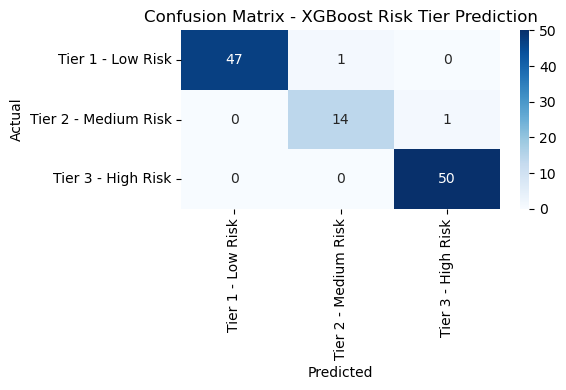


 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        48
           1       0.93      0.93      0.93        15
           2       0.98      1.00      0.99        50

    accuracy                           0.98       113
   macro avg       0.97      0.97      0.97       113
weighted avg       0.98      0.98      0.98       113


 Accuracy Score: 98.23%


In [ ]:

# Step 1: dataset
df = pd.read_csv("/Users/rg/ACADEMICS/Interview/Connected Data Comapany/MAY/Dataset/Unique_Scores_for_Client/clients_sorted_by_risk.csv")

# Step 2: missing rows in key fields
df_model = df.dropna(subset=[
    'Arrears Balance', 'dp1 Score', 'dp3 Score',
    'Mobile_Available', 'Email_Available', 'Residency Zone', 'Action_Tier'
])

# Step 3: Encode Action Tier (target variable)
le = LabelEncoder()
df_model['Action_Tier_Encoded'] = le.fit_transform(df_model['Action_Tier'])

# Step 4: One-hot encode Residency Zone
df_model = pd.get_dummies(df_model, columns=['Residency Zone'])

# Step 5:  feature list
feature_cols = [
    'Arrears Balance', 'dp1 Score', 'dp3 Score',
    'Mobile_Available', 'Email_Available'
] + [col for col in df_model.columns if col.startswith('Residency Zone_')]

X = df_model[feature_cols]
y = df_model['Action_Tier_Encoded']

# Step 6: Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7:  XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model.fit(X_train, y_train)

# Step 8: Prediction and evaluating
y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Step 9: Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - XGBoost Risk Tier Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Step 10:  Evaluation
print("\n Classification Report:\n", class_report)
print(f"\n Accuracy Score: {accuracy * 100:.2f}%")


###  Confusion Matrix – XGBoost Risk Tier Prediction

This confusion matrix shows how well the XGBoost model predicted the risk tiers (Low, Medium, High) for the clients based on their features.

| Actual / Predicted | Tier 1 – Low Risk | Tier 2 – Medium Risk | Tier 3 – High Risk |
|--------------------|------------------:|----------------------:|-------------------:|
| **Tier 1 – Low Risk**     | **47**              | 1                    | 0                 |
| **Tier 2 – Medium Risk**  | 0                   | **14**              | 1                 |
| **Tier 3 – High Risk**    | 0                   | 0                    | **50**            |

 **Overall Accuracy**: ~98.23%

 Most predictions are correctly classified.  
 Very few misclassifications — model performs well across all risk tiers.
